Enter your blood glucose level (mg/dL):  88


The equivalent A1C number is: 4.69


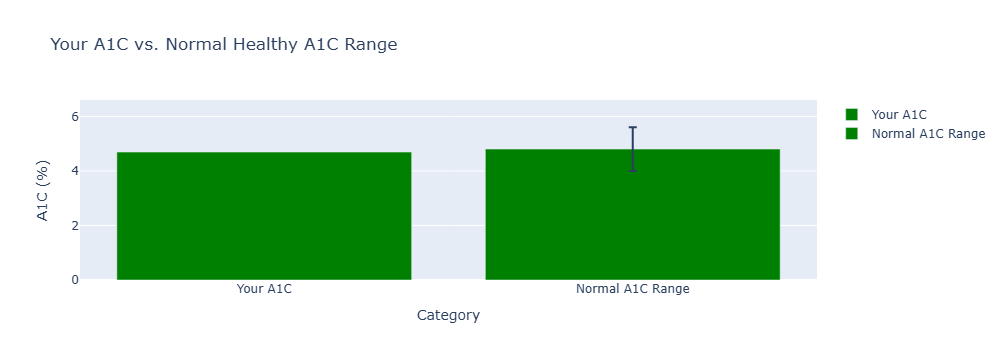

In [21]:
import plotly.graph_objects as go

def calculate_a1c(blood_glucose):
    """
    Calculate A1C from blood glucose level using the formula:
    A1C = (Blood Glucose + 46.7) / 28.7
    """
    a1c = (blood_glucose + 46.7) / 28.7
    return round(a1c, 2)

def get_color(a1c, normal_min, normal_max):
    """
    Determine the color of the A1C bar based on the value.
    """
    if normal_min <= a1c <= normal_max:
        return 'green'
    else:
        return 'red'

def main():
    try:
        blood_glucose = float(input("Enter your blood glucose level (mg/dL): "))
        if blood_glucose < 0:
            print("Please enter a positive number.")
        else:
            user_a1c = calculate_a1c(blood_glucose)
            print(f"The equivalent A1C number is: {user_a1c}")

            # Normal A1C range
            normal_a1c_min = 4.0
            normal_a1c_max = 5.6
            normal_a1c_avg = (normal_a1c_min + normal_a1c_max) / 2

            # Determine the color for the user's A1C bar
            user_a1c_color = get_color(user_a1c, normal_a1c_min, normal_a1c_max)

            fig = go.Figure()

            # Adding user's A1C bar
            fig.add_trace(go.Bar(
                x=['Your A1C'],
                y=[user_a1c],
                name='Your A1C',
                marker_color=user_a1c_color
            ))

            # Adding normal A1C range
            fig.add_trace(go.Bar(
                x=['Normal A1C Range'],
                y=[normal_a1c_avg],
                name='Normal A1C Range',
                marker_color='green',
                error_y=dict(
                    type='data',
                    array=[(normal_a1c_max - normal_a1c_min) / 2],
                    visible=True
                )
            ))

            # Updating layout for better readability
            fig.update_layout(
                title='Your A1C vs. Normal Healthy A1C Range',
                xaxis_title='Category',
                yaxis_title='A1C (%)',
                yaxis=dict(range=[0, max(user_a1c, normal_a1c_max) + 1]),
                barmode='group'
            )

            fig.show()
    except ValueError:
        print("Please enter a valid number.")

if __name__ == "__main__":
    main()
